In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import glob

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
list_netcdf = []
for file_name in glob.glob("/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc"):
    list_netcdf.append(file_name)

In [4]:
ds = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc')

In [5]:
list_netcdf = []
for file_name in glob.glob("/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc"):
    list_netcdf.append(file_name)

In [6]:
ds_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_oae/*.nc')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


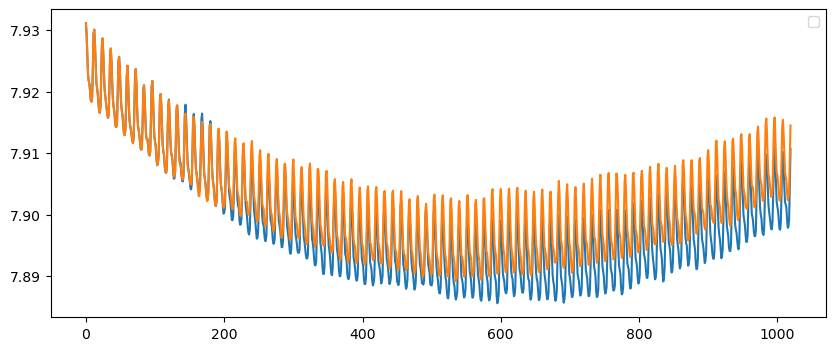

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(ds.ph.mean(dim=('y', 'x')))
plt.plot(ds_oae.ph.mean(dim=('y', 'x')))
plt.legend()
plt.show()

In [33]:
sliced_data_baseline = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 10) & (35 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [34]:
sliced_data_oae = ds_oae.where((-25 < ds_oae.nav_lon) & (ds_oae.nav_lon < 10) & (35 < ds_oae.nav_lat) & (ds_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

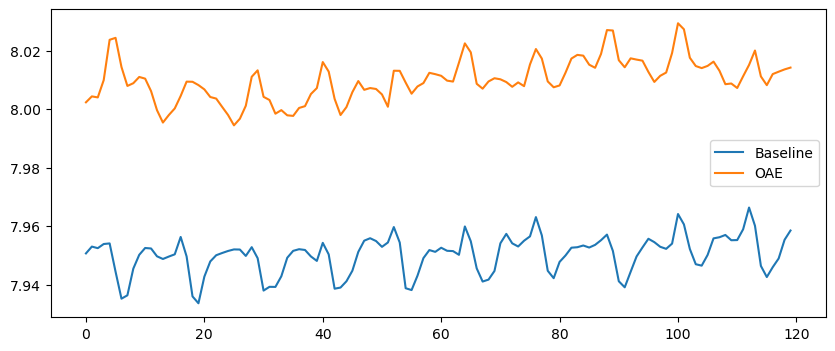

In [40]:
plt.figure(figsize=(10, 4))
plt.plot(sliced_frame_baseline.ph.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_frame_oae.ph.mean(dim=('y', 'x')), label = 'OAE')
plt.legend()
plt.show()

In [41]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_flux_baseline = sliced_data_baseline["ph"].sel(time_counter=slice(start_date, end_date))

In [42]:
ph_season_summary_baseline = ph_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_baseline = ph_flux_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
ph_seasonal_mean_baseline = ph_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [45]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_flux_oae = sliced_data_oae["ph"].sel(time_counter=slice(start_date, end_date))

In [46]:
ph_season_summary_oae = ph_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_oae = ph_flux_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
ph_seasonal_mean_oae = ph_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


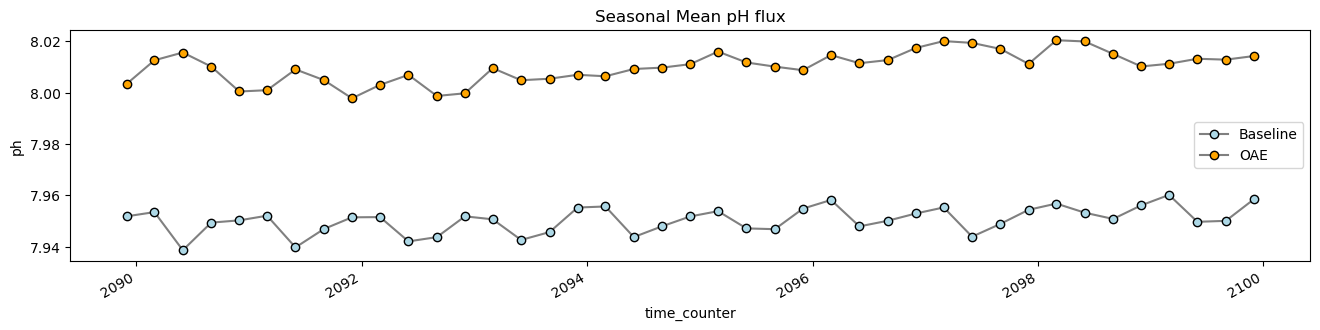

In [51]:
f, ax = plt.subplots(figsize=(16, 3))
ph_seasonal_mean_baseline.plot(marker="o",
                        color="grey",
                        markerfacecolor="lightblue",
                        markeredgecolor="black", 
                        label = 'Baseline')
ax.set(title="Seasonal Mean pH flux")

ph_seasonal_mean_oae.plot(marker="o",
                        color="grey",
                        markerfacecolor="orange",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set(title="Seasonal Mean pH flux")

plt.legend()
plt.show()